In [1528]:
import csv
import numpy as np
import pandas as pd
import math
import random as rd
import matplotlib.pyplot as plt  
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
# all the sklearn library packages are searched in google and related models are
# immitated by the samples before implemented

In [231]:
totalTrainList=pd.read_csv("/Users/jiazhidai/Downloads/python3/student_performance_train.csv",delimiter=',')
totalTestList=pd.read_csv("/Users/jiazhidai/Downloads/python3/student_performance_test.csv",delimiter=',')

In [173]:
totalTrainList

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS,M,17,R,GT3,T,1,1,other,services,...,4,5,5,1,3,2,0,10,9,10
1,MS,F,17,U,LE3,A,3,2,services,other,...,1,2,3,1,2,5,0,15,14,15
2,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
3,MS,M,16,U,LE3,A,2,2,other,services,...,4,1,2,2,2,5,0,12,13,13
4,MS,F,17,U,GT3,T,2,2,other,at_home,...,3,4,3,1,1,3,8,10,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,GP,M,17,U,LE3,T,4,4,services,other,...,5,3,5,4,5,3,15,13,12,12
482,MS,F,17,R,GT3,T,1,1,at_home,at_home,...,3,5,5,2,2,4,3,10,11,10
483,MS,M,18,U,LE3,T,1,2,at_home,services,...,4,1,4,5,5,1,8,10,11,11
484,MS,M,17,U,GT3,T,1,1,other,other,...,4,4,3,2,4,5,4,8,9,9


In [328]:
totalTestList

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,3,4,1,1,5,12,12,12,12
1,GP,F,18,U,LE3,T,1,1,other,other,...,4,4,3,1,1,3,2,13,13,13
2,GP,M,18,U,GT3,T,2,2,other,other,...,5,4,2,1,2,5,6,15,14,15
3,GP,F,17,U,GT3,T,4,3,health,services,...,4,2,2,1,2,3,0,17,18,18
4,GP,F,15,U,LE3,A,4,3,other,other,...,5,2,2,1,1,5,4,10,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,GP,F,16,U,GT3,T,4,2,health,services,...,4,2,3,1,1,3,0,17,17,18
159,GP,F,17,U,GT3,T,3,2,other,other,...,4,3,2,2,3,2,0,12,13,15
160,GP,F,17,U,LE3,T,4,2,teacher,services,...,4,2,3,1,1,4,2,14,15,17
161,GP,M,15,U,LE3,T,2,2,services,services,...,5,3,3,1,3,4,2,13,12,13


# Classification

## Trivial System

In [374]:
#shuffle all the training data and create validate data
def shuffle_data(totalTrainList):
    idx_list=list(range(0,len(totalTrainList)))
    shuffled_idx=rd.sample(idx_list,len(idx_list))
    training_idx=shuffled_idx[0:400]
    validate_idx=shuffled_idx[400:]

    shuffled_trainingList=pd.DataFrame(columns=totalTrainList.columns)
    shuffled_validateList=pd.DataFrame(columns=totalTrainList.columns)
    for idx in training_idx:
        shuffled_trainingList=shuffled_trainingList.append(totalTrainList[idx:idx+1])
    for idx in validate_idx:
        shuffled_validateList=shuffled_validateList.append(totalTrainList[idx:idx+1])
    return shuffled_trainingList,shuffled_validateList

In [1380]:
# generate trival P
seq=['A','B','C','D','F']
def P_trivial_generate(target_g):
    trainList, validateList=shuffle_data(totalTrainList)
    G_A=trainList[trainList[target_g]>=16]
    G_B=trainList[(trainList[target_g]>=14) & (trainList[target_g]<16)]
    G_C=trainList[(trainList[target_g]>=12) & (trainList[target_g]<14)]
    G_D=trainList[(trainList[target_g]>=10) & (trainList[target_g]<12)]
    G_F=trainList[trainList[target_g]<10]
    P_A_trivial=len(G_A)/len(trainList)
    P_B_trivial=len(G_B)/len(trainList)
    P_C_trivial=len(G_C)/len(trainList)
    P_D_trivial=len(G_D)/len(trainList)
    P_F_trivial=len(G_F)/len(trainList)
#     seq=['A','B','C','D','F']
    P_trivial_G=[P_A_trivial, P_B_trivial, P_C_trivial, P_D_trivial, P_F_trivial]
    return P_trivial_G, validateList

In [1381]:
# a function to generate random classes
def generate_random_class(sequence, probability):
    random_loc = rd.uniform(0, 1)
    total_probability = 0.0
    for class_i, class_i_probability in zip(sequence, probability):
        total_probability += class_i_probability
        if random_loc < total_probability:
            break
    return class_i
# this def is from the internet
#https://blog.csdn.net/liulicuican/article/details/102502540

In [1382]:
# test trivial
def trivial_accurate(sequence, probability, target_g, pred_g, testlist):
    predict_P_trivial=[]
    testlist_wP=[]
    for i in range(0,len(testlist)):
        random_P=''
        random_P=generate_random_class(sequence, probability)
        predict_P_trivial.append(random_P)

    testlist_wP=testlist.copy()
    testlist_wP[pred_g]=predict_P_trivial
    testlist_wP.reset_index(drop=True, inplace=True)
    
    num_correct=0
    for i in range(0,len(testlist)):
        row=testlist_wP[i:i+1]
        if row.at[i,target_g]>=16 and row.at[i,pred_g]=='A':
            num_correct+=1
        elif row.at[i, target_g]>=14 and row.at[i,target_g]<16 and row.at[i,pred_g]=='B':
            num_correct+=1
        elif row.at[i,target_g]>=12 and row.at[i,target_g]<14 and row.at[i,pred_g]=='C':
            num_correct+=1
        elif row.at[i,target_g]>=10 and row.at[i,target_g]<12 and row.at[i,pred_g]=='D':
            num_correct+=1
        elif row.at[i,target_g]<10 and row.at[i,pred_g]=='F':
            num_correct+=1
    accurate=num_correct/len(testlist)
    return accurate

In [1383]:
def calculate_accurate(sequence, probability, target_g, pred_g, testlist):
    mean_trivial_accurate=0
    sum_accurate=0
    for i in range(0,10):
        sum_accurate+=trivial_accurate(sequence, probability, target_g, pred_g, testlist)
    mean_trivial_accurate=sum_accurate/10
    return mean_trivial_accurate

mission 1

In [1384]:
trivial_best_G1_P=[]
max_P=0
for i in range(0,10):
    P_trivial_G1, validateList=P_trivial_generate('G1')
    temp_P = calculate_accurate(seq,P_trivial_G1,'G1','pred_G1',validateList)
    if temp_P > max_P:
        trivial_best_G1_P = P_trivial_G1
        max_P = temp_P
calculate_accurate(seq, trivial_best_G1_P, 'G1', 'pred_G1', totalTestList)


0.22024539877300614

In [1396]:

predict_P_trivial=[]
testlist_wP=[]
for i in range(0,len(totalTestList)):
    random_P=''
    random_P=generate_random_class(seq, trivial_best_G1_P)
    predict_P_trivial.append(random_P)

testlist_wP=totalTestList.copy()
testlist_wP['pred_G1']=predict_P_trivial

cate_G1=[]
for i in testlist_wP['G1']:
    if i>=16:
        cate_G1.append('A')
    elif i<16 and i>=14:
        cate_G1.append('B')
    elif i<14 and i>=12:
        cate_G1.append('C')
    elif i<12 and i>=10:
        cate_G1.append('D')
    else:
        cate_G1.append('F')


In [1393]:
# f1_score(y_true, y_pred, average='macro')
f1_score(cate_G1, predict_P_trivial, average='macro')

0.18426125554850983

In [1394]:
cm=confusion_matrix(cate_G1, predict_P_trivial, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
cm

array([[ 0,  1,  2,  6,  3],
       [ 1,  7,  7,  7,  5],
       [ 3,  6,  7, 12, 11],
       [ 1,  5, 17, 12, 13],
       [ 1,  6, 11, 10,  9]])

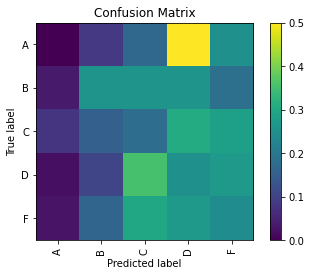

In [1395]:
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

mission 2 and 3

In [258]:
trivial_best_G3_P=[]
max_P=0
for i in range(0,10):
    P_trivial_G3, validateList=P_trivial_generate('G3')
    temp_P = calculate_accurate(seq, P_trivial_G3,'G3','pred_G3',validateList)
    if temp_P > max_P:
        trivial_best_G3_P = P_trivial_G3
        max_P = temp_P
calculate_accurate(seq, trivial_best_G3_P, 'G3', 'pred_G3', totalTestList)

0.2202453987730061

In [1405]:
predict_P_trivial3=[]
testlist_wP=[]
for i in range(0,len(totalTestList)):
    random_P=''
    random_P=generate_random_class(seq, trivial_best_G3_P)
    predict_P_trivial3.append(random_P)

testlist_wP=totalTestList.copy()
testlist_wP['pred_G3']=predict_P_trivial3

cate_G3=[]
for i in testlist_wP['G3']:
    if i>=16:
        cate_G3.append('A')
    elif i<16 and i>=14:
        cate_G3.append('B')
    elif i<14 and i>=12:
        cate_G3.append('C')
    elif i<12 and i>=10:
        cate_G3.append('D')
    else:
        cate_G3.append('F')


In [1409]:
f1_score(cate_G3, predict_P_trivial3, average='macro')

0.18786857055540732

In [1411]:
cm=confusion_matrix(cate_G3, predict_P_trivial3, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
cm

array([[ 1,  1,  9,  8,  2],
       [ 7,  4,  5, 11,  1],
       [ 7, 11,  9, 11,  1],
       [ 5,  8, 15, 13,  9],
       [ 2,  3,  4, 10,  6]])

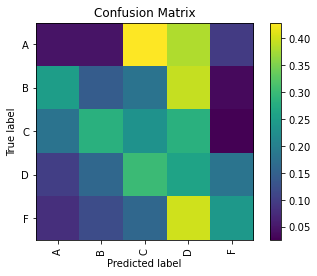

In [1412]:
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

## Baseline System

In [1413]:
# preprocessing data : turning all the non-binary and binary categorial data
totalTrainList_wo4=totalTrainList.drop(['Mjob','Fjob','reason','guardian'],axis=1)
totalTrainList_wo4_wog123=totalTrainList_wo4.drop(['G1','G2','G3'],axis=1)
totalTrainList_wo4_wog3=totalTrainList_wo4.drop(['G3'],axis=1)

totalTestList_wo4=totalTestList.drop(['Mjob','Fjob','reason','guardian'],axis=1)
totalTestList_wo4_wog123=totalTestList_wo4.drop(['G1','G2','G3'],axis=1)
totalTestList_wo4_wog3=totalTestList_wo4.drop(['G3'],axis=1)

processed_test=pd.get_dummies(totalTestList_wo4_wog123)
processed_test_wo3=pd.get_dummies(totalTestList_wo4_wog3)


In [1414]:
true_P=[]
for i in range(0,len(totalTestList_wo4)):
    row=totalTestList_wo4[i:i+1]
    if row.at[i,'G1']>=16:
        true_P.append('A')
    elif row.at[i,'G1']>=14 and row.at[i,'G1']<16:
        true_P.append('B')
    elif row.at[i,'G1']>=12 and row.at[i,'G1']<14:
        true_P.append('C')
    elif row.at[i,'G1']>=10 and row.at[i,'G1']<12:
        true_P.append('D')
    elif row.at[i,'G1']<10:
        true_P.append('F')

In [1415]:
processed_list_A=pd.get_dummies(totalTrainList_wo4_wog123)[totalTrainList_wo4['G1']>=16]
processed_list_B=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G1']>=14) & (totalTrainList_wo4['G1']<16)]
processed_list_C=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G1']>=12) & (totalTrainList_wo4['G1']<14)]
processed_list_D=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G1']>=10) & (totalTrainList_wo4['G1']<12)]
processed_list_F=pd.get_dummies(totalTrainList_wo4_wog123)[totalTrainList_wo4['G1']<10]

list_A_mean=processed_list_A.mean()
list_B_mean=processed_list_B.mean()
list_C_mean=processed_list_C.mean()
list_D_mean=processed_list_D.mean()
list_F_mean=processed_list_F.mean()

processed_test=pd.get_dummies(totalTestList_wo4_wog123)

In [1416]:
pred_P=[]
for i in range(0,len(processed_test)):
    row = processed_test[i:i+1]
    distA = np.linalg.norm(row-list_A_mean)
    distB = np.linalg.norm(row-list_B_mean)
    distC = np.linalg.norm(row-list_C_mean)
    distD = np.linalg.norm(row-list_D_mean)
    distF = np.linalg.norm(row-list_F_mean)
    min_dist=min(distA,distB,distC,distD,distF)
    if min_dist==distA:
        pred_P.append('A')
    elif min_dist==distB:
        pred_P.append('B')
    elif min_dist==distC:
        pred_P.append('C')
    elif min_dist==distD:
        pred_P.append('D')
    else:
        pred_P.append('F')

mission 1

In [532]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==pred_P[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.25153374233128833

In [1417]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, pred_P, average='macro')

0.2385018737761655

[[10  1  0  0  1]
 [14  4  1  2  6]
 [20  2  4  7  6]
 [21  2  3  7 15]
 [ 9  3  4  5 16]]


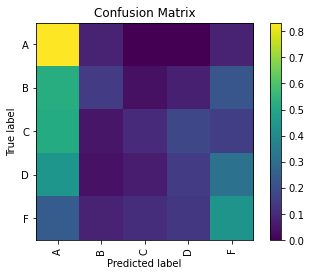

In [1418]:
cm=confusion_matrix(true_P, pred_P, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1420]:
true_P3=[]
for i in range(0,len(totalTestList_wo4)):
    row=totalTestList_wo4[i:i+1]
    if row.at[i,'G3']>=16:
        true_P3.append('A')
    elif row.at[i,'G3']>=14 and row.at[i,'G3']<16:
        true_P3.append('B')
    elif row.at[i,'G3']>=12 and row.at[i,'G3']<14:
        true_P3.append('C')
    elif row.at[i,'G3']>=10 and row.at[i,'G3']<12:
        true_P3.append('D')
    elif row.at[i,'G3']<10:
        true_P3.append('F')

In [1421]:
processed_list_A3=pd.get_dummies(totalTrainList_wo4_wog123)[totalTrainList_wo4['G3']>=16]
processed_list_B3=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G3']>=14) & (totalTrainList_wo4['G3']<16)]
processed_list_C3=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G3']>=12) & (totalTrainList_wo4['G3']<14)]
processed_list_D3=pd.get_dummies(totalTrainList_wo4_wog123)[(totalTrainList_wo4['G3']>=10) & (totalTrainList_wo4['G3']<12)]
processed_list_F3=pd.get_dummies(totalTrainList_wo4_wog123)[totalTrainList_wo4['G3']<10]

list_A_mean3=processed_list_A3.mean()
list_B_mean3=processed_list_B3.mean()
list_C_mean3=processed_list_C3.mean()
list_D_mean3=processed_list_D3.mean()
list_F_mean3=processed_list_F3.mean()

processed_test=pd.get_dummies(totalTestList_wo4_wog123)


In [1422]:
pred_P3=[]
for i in range(0,len(processed_test)):
    row = processed_test[i:i+1]
    distA = np.linalg.norm(row-list_A_mean3)
    distB = np.linalg.norm(row-list_B_mean3)
    distC = np.linalg.norm(row-list_C_mean3)
    distD = np.linalg.norm(row-list_D_mean3)
    distF = np.linalg.norm(row-list_F_mean3)
    min_dist=min(distA,distB,distC,distD,distF)
    if min_dist==distA:
        pred_P3.append('A')
    elif min_dist==distB:
        pred_P3.append('B')
    elif min_dist==distC:
        pred_P3.append('C')
    elif min_dist==distD:
        pred_P3.append('D')
    else:
        pred_P3.append('F')

mission 2

In [1423]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==pred_P3[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.26993865030674846

In [1424]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P3, pred_P3, average='macro')

0.25615310075831604

[[ 7  1  9  0  4]
 [ 9  4  8  1  6]
 [ 6  4 17  6  6]
 [10  3 16  6 15]
 [ 4  1  6  4 10]]


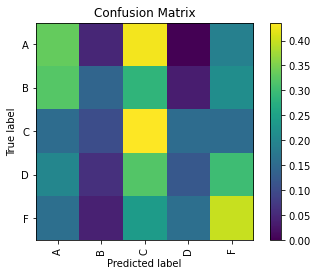

In [1425]:
cm=confusion_matrix(true_P3, pred_P3, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1426]:
true_P4=[]
for i in range(0,len(totalTestList_wo4)):
    row=totalTestList_wo4[i:i+1]
    if row.at[i,'G3']>=16:
        true_P4.append('A')
    elif row.at[i, 'G3']>=14 and row.at[i,'G3']<16:
        true_P4.append('B')
    elif row.at[i,'G3']>=12 and row.at[i,'G3']<14:
        true_P4.append('C')
    elif row.at[i,'G3']>=10 and row.at[i,'G3']<12:
        true_P4.append('D')
    elif row.at[i,'G3']<10:
        true_P4.append('F')


In [1427]:
processed_list_A=pd.get_dummies(totalTrainList_wo4_wog3)[totalTrainList_wo4['G3']>=16]
processed_list_B=pd.get_dummies(totalTrainList_wo4_wog3)[(totalTrainList_wo4['G3']>=14) & (totalTrainList_wo4['G3']<16)]
processed_list_C=pd.get_dummies(totalTrainList_wo4_wog3)[(totalTrainList_wo4['G3']>=12) & (totalTrainList_wo4['G3']<14)]
processed_list_D=pd.get_dummies(totalTrainList_wo4_wog3)[(totalTrainList_wo4['G3']>=10) & (totalTrainList_wo4['G3']<12)]
processed_list_F=pd.get_dummies(totalTrainList_wo4_wog3)[totalTrainList_wo4['G3']<10]

list_A_mean4=processed_list_A.mean()
list_B_mean4=processed_list_B.mean()
list_C_mean4=processed_list_C.mean()
list_D_mean4=processed_list_D.mean()
list_F_mean4=processed_list_F.mean()

processed_test=pd.get_dummies(totalTestList_wo4_wog3)

In [1428]:
pred_P4=[]
for i in range(0,len(processed_test)):
    row = processed_test[i:i+1]
    distA = np.linalg.norm(row-list_A_mean4)
    distB = np.linalg.norm(row-list_B_mean4)
    distC = np.linalg.norm(row-list_C_mean4)
    distD = np.linalg.norm(row-list_D_mean4)
    distF = np.linalg.norm(row-list_F_mean4)mission 1
    min_dist=min(distA,distB,distC,distD,distF)
    if min_dist==distA:
        pred_P4.append('A')
    elif min_dist==distB:
        pred_P4.append('B')
    elif min_dist==distC:
        pred_P4.append('C')
    elif min_dist==distD:
        pred_P4.append('D')
    else:
        pred_P4.append('F')


mission 3

In [1429]:
num_acc4=0
for i in range(0,len(totalTestList)):
    if true_P4[i]==pred_P4[i]:
        num_acc4+=1
total_acc_rate4=num_acc4/len(totalTestList)
total_acc_rate4

0.6012269938650306

In [1430]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P4, pred_P4, average='macro')

0.6150584274113686

[[16  5  0  0  0]
 [ 8 13  5  2  0]
 [ 0  5 26  8  0]
 [ 0  0 18 23  9]
 [ 0  0  0  5 20]]


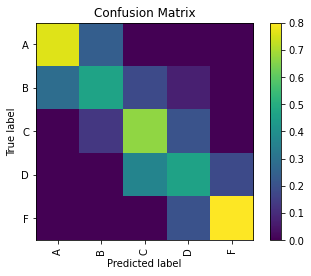

In [1431]:
cm=confusion_matrix(true_P4, pred_P4, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

preprocessing

In [1432]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if feature_name == 'G1' or feature_name == 'G2' or feature_name == 'G3':
            result[feature_name] = df[feature_name] 
#         else:
        elif max_value > 0 and max_value != min_value:
#             max_value = df[feature_name].max()
#             min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        elif max_value == min_value:
            result[feature_name] = max_value
    return result

In [1433]:
totalTrainList_wog123=totalTrainList.drop(['G1','G2','G3'],axis=1)
totalTrainList_wog123_processed=pd.get_dummies(totalTrainList_wog123)
x = totalTrainList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTrainList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTrainList_wog123_processed.columns)

totalTrainList_wclass=totalTrainList.copy()

totalTestList_wog123=totalTestList.drop(['G1','G2','G3'],axis=1)
totalTestList_wog123_processed=pd.get_dummies(totalTestList_wog123)
x = totalTestList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTestList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTestList_wog123_processed.columns)


totalTestList_wog3=totalTestList.drop(['G3'],axis=1)
totalTestList_wog3_processed=pd.get_dummies(totalTestList_wog3)
totalTestList_wog3_processed=normalize(totalTestList_wog3_processed)


totalTrainList_processed=pd.get_dummies(totalTrainList)
totalTrainList_processed=normalize(totalTrainList_processed)

## SVM

In [1674]:
def create_shuffle(target_g):
    shuffle_train,shuffle_validate=shuffle_data(totalTrainList_processed)
    shuffle_train.reset_index(drop=True)
    train_class=[]
    for i in range(0,len(shuffle_train)):

        if shuffle_train.iloc[i][target_g]>=16:
            train_class.append('A')
        elif shuffle_train.iloc[i][target_g]>=14 and shuffle_train.iloc[i][target_g]<16:
            train_class.append('B')
        elif shuffle_train.iloc[i][target_g]>=12 and shuffle_train.iloc[i][target_g]<14:
            train_class.append('C')
        elif shuffle_train.iloc[i][target_g]>=10 and shuffle_train.iloc[i][target_g]<12:
            train_class.append('D')
        elif shuffle_train.iloc[i][target_g]<10:
            train_class.append('F')
    shuffle_train=shuffle_train.drop(['G1','G2','G3'],axis=1)
    shuffle_train_wclass=shuffle_train.copy()
    shuffle_train_wclass['class_g']=train_class

    shuffle_validate.reset_index(drop=True)
    validate_class=[]
    for i in range(0,len(shuffle_validate)):

        if shuffle_validate.iloc[i][target_g]>=16:
            validate_class.append('A')
        elif shuffle_validate.iloc[i][target_g]>=14 and shuffle_validate.iloc[i][target_g]<16:
            validate_class.append('B')
        elif shuffle_validate.iloc[i][target_g]>=12 and shuffle_validate.iloc[i][target_g]<14:
            validate_class.append('C')
        elif shuffle_validate.iloc[i][target_g]>=10 and shuffle_validate.iloc[i][target_g]<12:
            validate_class.append('D')
        elif shuffle_validate.iloc[i][target_g]<10:
            validate_class.append('F')
    shuffle_validate=shuffle_validate.drop(['G1','G2','G3'],axis=1)
    shuffle_validate_wclass=shuffle_validate.copy()
    shuffle_validate_wclass['class_g']=validate_class
    return shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class

In [1675]:
# sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, 
# coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
# verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

def SVM(train,train_wclass,test,class_g):
    svm_X=train
    svm_Y=train_wclass[class_g]
    clf = svm.SVC()
    clf.fit(svm_X, svm_Y)
    result = clf.predict(test)
    return result

In [1676]:
classes_g1=[]
for i in range(0,len(totalTrainList_wo4)):
    row=totalTrainList_wo4[i:i+1]
    if row.at[i,'G1']>=16:
        classes_g1.append('A')
    elif row.at[i,'G1']>=14 and row.at[i,'G1']<16:
        classes_g1.append('B')
    elif row.at[i,'G1']>=12 and row.at[i,'G1']<14:
        classes_g1.append('C')
    elif row.at[i,'G1']>=10 and row.at[i,'G1']<12:
        classes_g1.append('D')
    elif row.at[i,'G1']<10:
        classes_g1.append('F')

In [1677]:
classes_g3=[]
for i in range(0,len(totalTrainList_wo4)):
    row=totalTrainList_wo4[i:i+1]
    if row.at[i,'G3']>=16:
        classes_g3.append('A')
    elif row.at[i,'G3']>=14 and row.at[i,'G3']<16:
        classes_g3.append('B')
    elif row.at[i,'G3']>=12 and row.at[i,'G3']<14:
        classes_g3.append('C')
    elif row.at[i,'G3']>=10 and row.at[i,'G3']<12:
        classes_g3.append('D')
    elif row.at[i,'G3']<10:
        classes_g3.append('F')

In [1678]:
max_acc_rate=0

for i in range(10):
    shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle('G1')
    result=SVM(shuffle_train,shuffle_train_wclass,shuffle_validate,'class_g')
    num_acc=0
    for i in range(0,len(validate_class)):
        if validate_class[i]==result[i]:
            num_acc+=1
    total_acc_rate=num_acc/len(validate_class)
    if total_acc_rate>max_acc_rate:
        max_acc_rate=total_acc_rate
        final_train=shuffle_train
        final_train_wclass=shuffle_train_wclass

In [1682]:
svm_X=final_train
svm_Y=final_train_wclass['class_g']
clf = svm.SVC()
clf.fit(svm_X, svm_Y)
result = clf.predict(totalTestList_wog123_processed)

mission 1

In [1683]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==result[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.34355828220858897

In [1684]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, result, average='macro')

0.2606928815507453

[[ 0  2  5  3  2]
 [ 0  3 10 12  2]
 [ 0  3 11 19  6]
 [ 0  4  8 24 12]
 [ 0  0  9 10 18]]


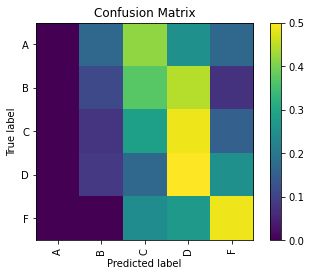

In [1685]:
cm=confusion_matrix(true_P, result, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1686]:
max_acc_rate=0

for i in range(10):
    shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle('G3')
    result=SVM(shuffle_train,shuffle_train_wclass,shuffle_validate,'class_g')
    num_acc=0
    for i in range(0,len(validate_class)):
        if validate_class[i]==result[i]:
            num_acc+=1
    total_acc_rate=num_acc/len(validate_class)
    if total_acc_rate>max_acc_rate:
        max_acc_rate=total_acc_rate
        final_train=shuffle_train
        final_train_wclass=shuffle_train_wclass

In [1444]:
svm_X=final_train
svm_Y=final_train_wclass['class_g']
clf = svm.SVC()
clf.fit(svm_X, svm_Y)
result = clf.predict(totalTestList_wog123_processed)

mission 2

In [1445]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==result[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.34355828220858897

In [1446]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, result, average='macro')

0.20857245337159253

[[ 0  7  9  5  0]
 [ 0  6 14  8  0]
 [ 0  2 21 16  0]
 [ 0  5 16 27  2]
 [ 0  1  3 19  2]]


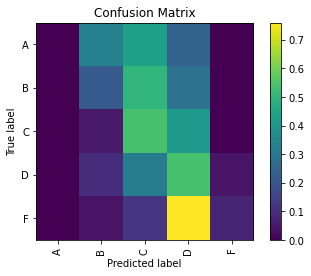

In [1447]:
cm=confusion_matrix(true_P3, result, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [883]:
def create_shuffle2(target_g):
    shuffle_train,shuffle_validate=shuffle_data(totalTrainList_processed)
    shuffle_train.reset_index(drop=True)
    train_class=[]
    for i in range(0,len(shuffle_train)):

        if shuffle_train.iloc[i][target_g]>=16:
            train_class.append('A')
        elif shuffle_train.iloc[i][target_g]>=14 and shuffle_train.iloc[i][target_g]<16:
            train_class.append('B')
        elif shuffle_train.iloc[i][target_g]>=12 and shuffle_train.iloc[i][target_g]<14:
            train_class.append('C')
        elif shuffle_train.iloc[i][target_g]>=10 and shuffle_train.iloc[i][target_g]<12:
            train_class.append('D')
        elif shuffle_train.iloc[i][target_g]<10:
            train_class.append('F')
    shuffle_train=shuffle_train.drop(['G3'],axis=1)
    shuffle_train_wclass=shuffle_train.copy()
    shuffle_train_wclass['class_g']=train_class
    shuffle_train=normalize(shuffle_train)

    
    shuffle_validate.reset_index(drop=True)
    validate_class=[]
    for i in range(0,len(shuffle_validate)):

        if shuffle_validate.iloc[i][target_g]>=16:
            validate_class.append('A')
        elif shuffle_validate.iloc[i][target_g]>=14 and shuffle_validate.iloc[i][target_g]<16:
            validate_class.append('B')
        elif shuffle_validate.iloc[i][target_g]>=12 and shuffle_validate.iloc[i][target_g]<14:
            validate_class.append('C')
        elif shuffle_validate.iloc[i][target_g]>=10 and shuffle_validate.iloc[i][target_g]<12:
            validate_class.append('D')
        elif shuffle_validate.iloc[i][target_g]<10:
            validate_class.append('F')
    shuffle_validate=shuffle_validate.drop(['G3'],axis=1)
    shuffle_validate_wclass=shuffle_validate.copy()
    shuffle_validate_wclass['class_g']=validate_class
    shuffle_validate=normalize(shuffle_validate)
    return shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class

In [884]:
max_acc_rate=0

for i in range(10):
    shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle2('G3')
    
    result=SVM(shuffle_train,shuffle_train_wclass,shuffle_validate,'class_g')
    num_acc=0
    for i in range(0,len(validate_class)):
        if validate_class[i]==result[i]:
            num_acc+=1
    total_acc_rate=num_acc/len(validate_class)
    if total_acc_rate>max_acc_rate:
        max_acc_rate=total_acc_rate
        final_train=shuffle_train
        final_train_wclass=shuffle_train_wclass

In [885]:
svm_X=final_train
svm_Y=final_train_wclass['class_g']
clf = svm.SVC()
clf.fit(svm_X, svm_Y)
result = clf.predict(totalTestList_wog3_processed)

mission 3

In [886]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P4[i]==result[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.7177914110429447

In [887]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P4, result, average='macro')

0.7157410260800091

In [888]:
# confusion_matrix(y_true, y_pred)
cm=confusion_matrix(true_P4, result, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
cm

array([[16,  5,  0,  0,  0],
       [ 3, 17,  6,  2,  0],
       [ 0,  4, 21, 14,  0],
       [ 0,  0,  0, 45,  5],
       [ 0,  0,  0,  7, 18]])

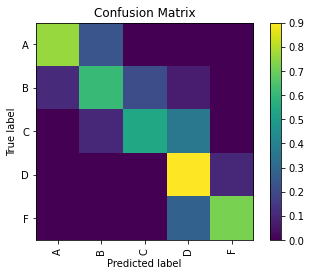

In [889]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   
    plt.imshow(cm, interpolation='nearest')   
    plt.title(title)    
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    
    plt.yticks(num_local, labels_name)    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, labels_name, "Confusion Matrix")

plt.show()

## kNN

In [1454]:
def kNN_Model_1(target_g,neighbors):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle(target_g)
        
        knn_model = KNeighborsClassifier(n_neighbors=neighbors)
        knn_model.fit(shuffle_train, shuffle_train_wclass['class_g'])
        test_preds = knn_model.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==test_preds[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1455]:
final_train,final_train_wclass=kNN_Model_1('G1',5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(shuffle_train, shuffle_train_wclass['class_g'])
test_preds = knn_model.predict(totalTestList_wog123_processed)

mission 1

In [1456]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==test_preds[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.25153374233128833

In [1457]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, test_preds, average='macro')

0.23498248471965621

[[ 4  3  2  2  1]
 [ 4  6  8  7  2]
 [ 6  8 12 12  1]
 [ 9  7 15 15  2]
 [ 5  5  5 18  4]]


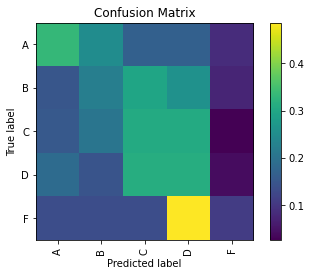

In [1458]:
cm=confusion_matrix(true_P, test_preds, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1459]:
final_train,final_train_wclass=kNN_Model_1('G3',5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(final_train, final_train_wclass['class_g'])
test_preds = knn_model.predict(totalTestList_wog123_processed)

mission 2

In [1460]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==test_preds[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.3006134969325153

In [1461]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P3, test_preds, average='macro')

0.28521549863964724

[[ 6  6  5  4  0]
 [ 6  9  7  4  2]
 [ 4 12 12 11  0]
 [ 9  8 13 18  2]
 [ 4  5  4  8  4]]


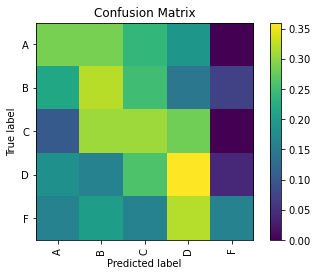

In [1463]:
cm=confusion_matrix(true_P3, test_preds, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1464]:
def kNN_Model_2(target_g,neighbors):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle2(target_g)
        
        knn_model = KNeighborsClassifier(n_neighbors=neighbors)
        knn_model.fit(shuffle_train, shuffle_train_wclass['class_g'])
        test_preds = knn_model.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==test_preds[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1465]:
final_train,final_train_wclass=kNN_Model_2('G3',5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(final_train, final_train_wclass['class_g'])
test_preds = knn_model.predict(totalTestList_wog3_processed)

mission 3

In [1466]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P4[i]==test_preds[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.6809815950920245

In [1467]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P4, test_preds, average='macro')

0.6833368347338935

[[16  5  0  0  0]
 [ 5 17  5  1  0]
 [ 0 13 19  7  0]
 [ 0  1  5 39  5]
 [ 0  0  0  5 20]]


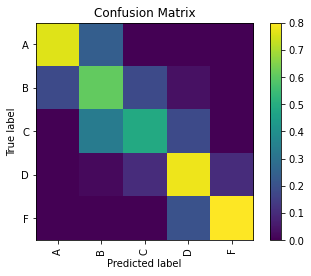

In [1468]:
cm=confusion_matrix(true_P4, test_preds, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

## Naive Bayes


In [1469]:
def Bayes_Model_1(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle(target_g)
        mnb = MultinomialNB()
        mnb.fit(shuffle_train,shuffle_train_wclass['class_g'])
        y_pre = mnb.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pre[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1470]:
final_train,final_train_wclass=Bayes_Model_1('G1')
mnb = MultinomialNB()
mnb.fit(shuffle_train,shuffle_train_wclass['class_g'])
y_pre = mnb.predict(totalTestList_wog123_processed)

mission 1

In [1471]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==y_pre[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.3067484662576687

In [1472]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, y_pre, average='macro')

0.2973419607475335

[[ 3  2  3  4  0]
 [ 4  6 10  7  0]
 [ 0  7 16 16  0]
 [ 1 11 12 17  7]
 [ 1  4  5 19  8]]


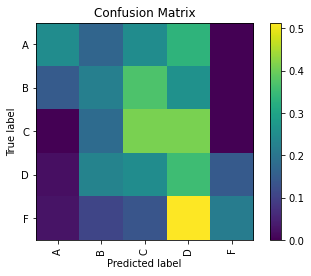

In [1473]:
cm=confusion_matrix(true_P, y_pre, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1474]:
final_train,final_train_wclass=Bayes_Model_1('G3')
mnb = MultinomialNB()
mnb.fit(final_train,final_train_wclass['class_g'])
y_pre = mnb.predict(totalTestList_wog123_processed)

mission 2

In [1475]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==y_pre[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.3067484662576687

In [1476]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P3, y_pre, average='macro')

0.27925483684397095

[[ 6  8  5  2  0]
 [ 4  7 15  2  0]
 [ 0  3 23 13  0]
 [ 0  2 16 30  2]
 [ 0  0  1 13 11]]


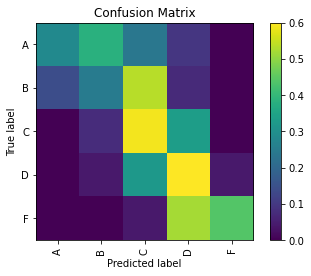

In [1482]:
cm=confusion_matrix(true_P3, y_pre, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1483]:
def Bayes_Model_2(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle2(target_g)
        mnb = MultinomialNB()
        mnb.fit(shuffle_train,shuffle_train_wclass['class_g'])
        y_pre = mnb.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pre[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1484]:
final_train,final_train_wclass=Bayes_Model_2('G3')
mnb = MultinomialNB()
mnb.fit(final_train,final_train_wclass['class_g'])
y_pre = mnb.predict(totalTestList_wog3_processed)

mission 3

In [1485]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P4[i]==y_pre[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.43558282208588955

In [1486]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P4, y_pre, average='macro')

0.4208640455152083

[[ 8  9  3  1  0]
 [ 7  9 10  2  0]
 [ 2  4 19 14  0]
 [ 3  2 15 27  3]
 [ 1  0  0 16  8]]


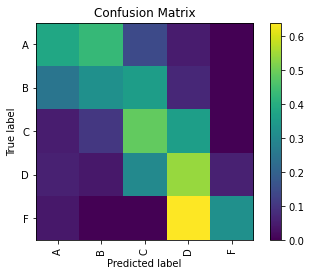

In [1487]:
cm=confusion_matrix(true_P4, y_pre, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

## decision tree

In [1035]:
def dtree_Model_1(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle(target_g)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(shuffle_train, shuffle_train_wclass['class_g'])
        decision_tree=clf.predict(shuffle_validate)
#         mnb = MultinomialNB()
#         mnb.fit(shuffle_train,shuffle_train_wclass['class_g'])
#         y_pre = mnb.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pre[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1488]:
final_train,final_train_wclass=dtree_Model_1('G1')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(final_train, final_train_wclass['class_g'])
decision_tree=clf.predict(totalTestList_wog123_processed)

mission 1

In [1489]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==decision_tree[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.32515337423312884

In [1490]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, decision_tree, average='macro')

0.28918378756114604

[[ 1  0  7  3  1]
 [ 2  6  6 11  2]
 [ 1  2 12 21  3]
 [ 2  2 10 18 16]
 [ 6  3  7  5 16]]


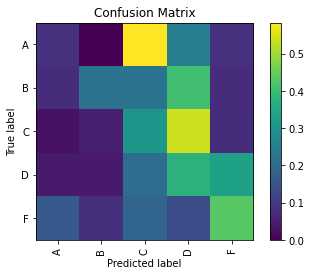

In [1491]:
cm=confusion_matrix(true_P, decision_tree, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1492]:
final_train,final_train_wclass=dtree_Model_1('G3')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(final_train, final_train_wclass['class_g'])
decision_tree=clf.predict(totalTestList_wog123_processed)

mission 2

In [1493]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==decision_tree[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.27607361963190186

In [1494]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P3, decision_tree, average='macro')

0.2697223811766782

[[ 3 10  4  4  0]
 [ 9  8  6  3  2]
 [ 5 13  9  7  5]
 [ 4  8 13 14 11]
 [ 3  2  2  7 11]]


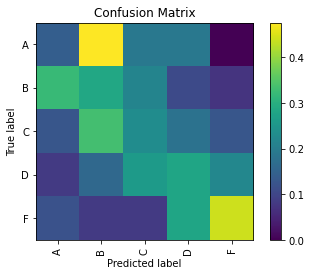

In [1495]:
cm=confusion_matrix(true_P3, decision_tree, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1042]:
def dtree_Model_2(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle2(target_g)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(shuffle_train, shuffle_train_wclass['class_g'])
        decision_tree=clf.predict(shuffle_validate)
#         mnb = MultinomialNB()
#         mnb.fit(shuffle_train,shuffle_train_wclass['class_g'])
#         y_pre = mnb.predict(shuffle_validate)
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pre[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1496]:
final_train,final_train_wclass=dtree_Model_2('G3')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(final_train, final_train_wclass['class_g'])
decision_tree=clf.predict(totalTestList_wog3_processed)

mission 3

In [1497]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P4[i]==decision_tree[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.6380368098159509

In [1498]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, decision_tree, average='macro')

0.5585057882802242

[[16  5  0  0  0]
 [10 12  5  1  0]
 [ 0 10 20  8  1]
 [ 0  0  6 36  8]
 [ 0  0  0  5 20]]


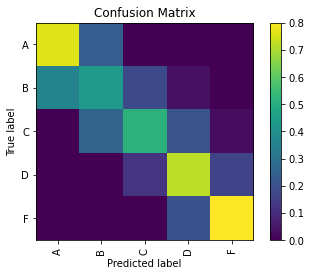

In [1499]:
cm=confusion_matrix(true_P4, decision_tree, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

## PCA+Random Forest

In [1500]:
def RF_Model_1(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle(target_g)
        
        pca = PCA(n_components=20)
        shuffle_train = pca.fit_transform(shuffle_train)
        shuffle_validate = pca.transform(shuffle_validate)
        
        classifier = RandomForestClassifier(random_state=0)
        classifier.fit(shuffle_train, shuffle_train_wclass['class_g'])
        # Predicting the Test set results
        y_pred = classifier.predict(shuffle_validate)
        
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pred[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1501]:
totalTestList_wog123=totalTestList.drop(['G1','G2','G3'],axis=1)
totalTestList_wog123_processed=pd.get_dummies(totalTestList_wog123)
x = totalTestList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTestList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTestList_wog123_processed.columns)

In [1502]:
final_train,final_train_wclass=dtree_Model_1('G1')

pca = PCA(n_components=25)
final_train = pca.fit_transform(final_train)
totalTestList_wog123_processed = pca.transform(totalTestList_wog123_processed)

classifier = RandomForestClassifier(random_state=0)
classifier.fit(final_train, final_train_wclass['class_g'])
# Predicting the Test set results
y_pred = classifier.predict(totalTestList_wog123_processed)

mission 1

In [1503]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P[i]==y_pred[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.3374233128834356

In [1505]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P, y_pred, average='macro')

0.2430945573672846

[[ 0  1  6  3  2]
 [ 0  1 11 14  1]
 [ 1  3  9 18  8]
 [ 0  4 10 26  8]
 [ 0  1  5 12 19]]


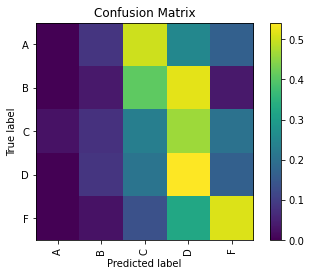

In [1506]:
cm=confusion_matrix(true_P, y_pred, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1507]:
totalTestList_wog123=totalTestList.drop(['G1','G2','G3'],axis=1)
totalTestList_wog123_processed=pd.get_dummies(totalTestList_wog123)
x = totalTestList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTestList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTestList_wog123_processed.columns)

In [1508]:
final_train,final_train_wclass=dtree_Model_1('G3')

pca = PCA(n_components=25)
final_train = pca.fit_transform(final_train)
totalTestList_wog123_processed = pca.transform(totalTestList_wog123_processed)

classifier = RandomForestClassifier(random_state=0)
classifier.fit(final_train, final_train_wclass['class_g'])
# Predicting the Test set results
y_pred = classifier.predict(totalTestList_wog123_processed)

mission 2

In [1509]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==y_pred[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.38650306748466257

In [1510]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P3, y_pred, average='macro')

0.3077309223120464

[[ 1  3  7 10  0]
 [ 2  7  6 13  0]
 [ 0  3 19 16  1]
 [ 0  7  8 32  3]
 [ 0  1  3 17  4]]


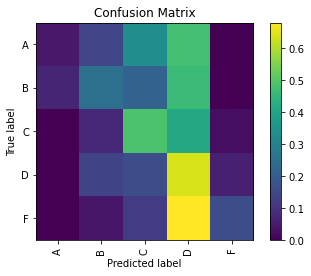

In [1511]:
cm=confusion_matrix(true_P3, y_pred, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

In [1512]:
def RF_Model_2(target_g):
    max_acc_rate=0
    for i in range(10):
        shuffle_train,shuffle_train_wclass,shuffle_validate,validate_class=create_shuffle2(target_g)
        
        pca = PCA(n_components=20)
        shuffle_train = pca.fit_transform(shuffle_train)
        shuffle_validate = pca.transform(shuffle_validate)
        
        classifier = RandomForestClassifier(random_state=0)
        classifier.fit(shuffle_train, shuffle_train_wclass['class_g'])
        # Predicting the Test set results
        y_pred = classifier.predict(shuffle_validate)
        
        num_acc=0
        for i in range(0,len(validate_class)):
            if validate_class[i]==y_pred[i]:
                num_acc+=1
        total_acc_rate=num_acc/len(validate_class)
        if total_acc_rate>max_acc_rate:
            max_acc_rate=total_acc_rate
            final_train=shuffle_train
            final_train_wclass=shuffle_train_wclass
    return final_train,final_train_wclass

In [1513]:
totalTestList_wog3=totalTestList.drop(['G3'],axis=1)
totalTestList_wog3_processed=pd.get_dummies(totalTestList_wog3)
totalTestList_wog3_processed=normalize(totalTestList_wog3_processed)

In [1514]:
final_train,final_train_wclass=dtree_Model_2('G3')
pca = PCA(n_components=25)
final_train = pca.fit_transform(final_train)
totalTestList_wog3_processed = pca.transform(totalTestList_wog3_processed)
classifier = RandomForestClassifier(random_state=0)
classifier.fit(final_train, final_train_wclass['class_g'])
# Predicting the Test set results
y_pred = classifier.predict(totalTestList_wog3_processed)

mission 3

In [1515]:
num_acc=0
for i in range(0,len(totalTestList)):
    if true_P3[i]==y_pred[i]:
        num_acc+=1
total_acc_rate=num_acc/len(totalTestList)
total_acc_rate

0.7055214723926381

In [1516]:
# f1_score(y_true, y_pred, average='macro')
f1_score(true_P4, y_pred, average='macro')

0.681784246149443

[[15  6  0  0  0]
 [ 8 12  6  2  0]
 [ 0  5 26  8  0]
 [ 0  0  2 46  2]
 [ 0  0  0  9 16]]


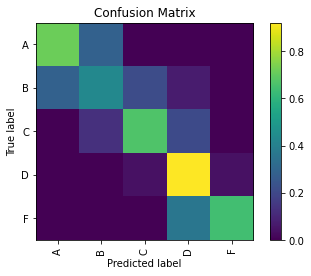

In [1517]:
cm=confusion_matrix(true_P4, y_pred, labels=["A", "B", "C","D","F"])
labels_name=["A", "B", "C", "D", "F"]
print(cm)
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()

# Regression

In [1518]:
totalTrainList=pd.read_csv("/Users/jiazhidai/Downloads/python3/student_performance_train.csv",delimiter=',')
totalTestList=pd.read_csv("/Users/jiazhidai/Downloads/python3/student_performance_test.csv",delimiter=',')

In [1519]:
totalTrainList_wog123=totalTrainList.drop(['G1','G2','G3'],axis=1)
totalTrainList_wog123_processed=pd.get_dummies(totalTrainList_wog123)
x = totalTrainList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTrainList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTrainList_wog123_processed.columns)

totalTestList_wog123=totalTestList.drop(['G1','G2','G3'],axis=1)
totalTestList_wog123_processed=pd.get_dummies(totalTestList_wog123)
x = totalTestList_wog123_processed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
totalTestList_wog123_processed = pd.DataFrame(x_scaled,columns=totalTestList_wog123_processed.columns)


totalTestList_wog3=totalTestList.drop(['G3'],axis=1)
totalTestList_wog3_processed=pd.get_dummies(totalTestList_wog3)
totalTestList_wog3_processed=normalize(totalTestList_wog3_processed)


totalTrainList_processed=pd.get_dummies(totalTrainList)
totalTrainList_processed=normalize(totalTrainList_processed)

totalTestList_processed=pd.get_dummies(totalTestList)
totalTestList_processed=normalize(totalTestList_processed)

## Trivial System 

In [1520]:
def trivial_regressor(target_g):
#     final_out=0
    for i in range(0,10):
        MSE=0
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList)
        
        train_mean=shuffle_train[target_g].mean()
        validate_output=shuffle_validate[target_g]
        for j in validate_output:
            MSE+=(j-train_mean)**2
        if i==0:
            min_MSE=400*400
            result=train_mean
        if min_MSE>MSE:
            min_MSE=MSE
            result=train_mean
    return result

In [1522]:
final_mean_pred=[]
final_mean=trivial_regressor('G1')
for i in range(len(totalTestList)):
    final_mean_pred.append(final_mean)

In [1524]:
final_MSE=mean_squared_error(totalTestList_processed['G1'], final_mean_pred)

mission 1

In [1527]:
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.8404314672678512

In [1529]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(totalTestList_processed['G1'], final_mean_pred)

2.2437423312883435

In [1530]:
# r2_score(y_true, y_pred)
r2_score(totalTestList_processed['G1'], final_mean_pred)

-9.53964862526746e-06

In [1531]:
final_mean_pred=[]
final_mean=trivial_regressor('G3')
for i in range(len(totalTestList)):
    final_mean_pred.append(final_mean)

In [1532]:
final_MSE=mean_squared_error(totalTestList_processed['G3'], final_mean_pred)

mission 2 and 3

In [1533]:
final_RMSE=np.sqrt(final_MSE)
final_RMSE

3.1755148367670407

In [1534]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(totalTestList_processed['G3'], final_mean_pred)

2.4712883435582818

In [1535]:
# r2_score(y_true, y_pred)
r2_score(totalTestList_processed['G3'], final_mean_pred)

-0.0007133822386899968

## Baseline model

### 1NN

In [1598]:
def pred_y_1NN(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        neigh = KNeighborsRegressor(n_neighbors=1)
        neigh.fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y=neigh.predict(shuffle_validate_wog123)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_neigh=neigh
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_neigh=neigh
    
    
    final_pred_y=final_neigh.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

In [1599]:
pred_y=pred_y_1NN('G1')
test_y=totalTestList['G1']

mission 1

In [1600]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

3.1748629263681596

In [1601]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.3865030674846626

In [1602]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

-0.2493538846229204

In [1603]:
pred_y=pred_y_1NN('G3')
test_y=totalTestList['G3']

mission 2

In [1604]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

3.2700537508949807

In [1605]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.496932515337423

In [1606]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

-0.06118523277356114

In [1577]:
def pred_y_1NN2(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        neigh = KNeighborsRegressor(n_neighbors=1)
        neigh.fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y=neigh.predict(shuffle_validate_wog3)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_neigh=neigh
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_neigh=neigh
    
    
    final_pred_y=final_neigh.predict(totalTestList_wog3_processed)
    
    return final_pred_y

In [1578]:
pred_y=pred_y_1NN2('G3')
test_y=totalTestList['G3']

mission 3

In [1579]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

1.3566468949384038

In [1580]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.9447852760736196

In [1581]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.8173519392816591

### Linear Regression

In [1582]:
def pred_y_LR(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        reg = LinearRegression().fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y=reg.predict(shuffle_validate_wog123)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_reg=reg
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_reg=reg
    
    
    final_pred_y=final_reg.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

In [1583]:
pred_y=pred_y_LR('G1')
test_y=totalTestList['G1']

mission 1

In [1584]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.416933844796481

In [1585]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

1.7657208588957056

In [1586]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.2759558666168279

mission 2

In [1587]:
pred_y=pred_y_LR('G3')
test_y=totalTestList['G3']

In [1588]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.7177813220377347

In [1589]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

1.9497699386503067

In [1590]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.26698909726009235

In [1591]:
def pred_y_LR2(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        reg = LinearRegression().fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y=reg.predict(shuffle_validate_wog3)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_reg=reg
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_reg=reg
    
    
    final_pred_y=final_reg.predict(totalTestList_wog3_processed)
    
    return final_pred_y

In [1592]:
pred_y=pred_y_LR2('G3')
test_y=totalTestList['G3']

mission 3

In [1593]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

1.0827802572551912

In [1594]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.7977257476993865

In [1595]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.8836511561409621

## kNN

In [1607]:
def pred_y_kNN(target_g,neighbor):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        neigh = KNeighborsRegressor(n_neighbors=neighbor)
        neigh.fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y=neigh.predict(shuffle_validate_wog123)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_neigh=neigh
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_neigh=neigh
    
    
    final_pred_y=final_neigh.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

In [1608]:
pred_y=pred_y_kNN('G1',15)
test_y=totalTestList['G1']

mission 1

In [1609]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.6475490588630404

In [1610]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.0482617586912064

In [1611]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.13119253253384022

mission 2

In [1612]:
pred_y=pred_y_kNN('G3',15)
test_y=totalTestList['G3']

In [1613]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.9182966523396106

In [1614]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.2482617586912066

In [1615]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.15483736395811332

In [1618]:
def pred_y_kNN2(target_g,neighbor):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        neigh = KNeighborsRegressor(n_neighbors=neighbor)
        neigh.fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y=neigh.predict(shuffle_validate_wog3)
        test_y=shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_neigh=neigh
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_neigh=neigh
    
    
    final_pred_y=final_neigh.predict(totalTestList_wog3_processed)
    
    return final_pred_y
        

In [1619]:
pred_y=pred_y_kNN2('G3',15)
test_y=totalTestList['G3']

mission 3

In [1620]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

1.1161820210081388

In [1621]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.7918200408997955

In [1622]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.8763621453282602

## SVR

In [1623]:
def pred_y_SVR(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = SVR(C=1.0, epsilon=0.2)
        clf.fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog123)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

In [1624]:
pred_y=pred_y_SVR('G1')
test_y=totalTestList['G1']

mission 1

In [1625]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.4635431673726536

In [1626]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

1.866445700093324

In [1627]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.24776096555919092

In [1628]:
pred_y=pred_y_SVR('G3')
test_y=totalTestList['G3']

mission 2

In [1629]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.781410856820877

In [1630]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.0635657789287816

In [1631]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.2322643526596242

In [1632]:
def pred_y_SVR2(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = SVR(C=1.0, epsilon=0.2)
        clf.fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog3)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog3_processed)
    
    return final_pred_y
        

In [1637]:
pred_y=pred_y_SVR2('G3')
test_y=totalTestList['G3']

mission 3

In [1638]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

1.1327874635928095

In [1639]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.7317108847387506

In [1640]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.8726560598385871

## Ridge Regression

In [1658]:
def pred_y_RR(target_g):
#     min_MSE=float('inf')
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = Ridge(alpha=1.0)
        clf.fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog123)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

In [1643]:
pred_y=pred_y_RR('G1')
test_y=totalTestList['G1']

mission 1

In [1644]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.4337974822889024

In [1645]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

1.8318525944561834

In [1646]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.26581689304882683

mission 2

In [1647]:
pred_y=pred_y_RR('G3')
test_y=totalTestList['G3']

In [1648]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.771181679570248

In [1649]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.0378447488164904

In [1650]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.23790096184707987

In [1653]:
def pred_y_RR2(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = Ridge(alpha=1.0)
        clf.fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog3)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog3_processed)
    
    return final_pred_y
        

In [1654]:
pred_y=pred_y_RR2('G3')
test_y=totalTestList['G3']

mission 3

In [1655]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

1.071758998540313

In [1656]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.7983375283276066

In [1657]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.886007653859711

## Lasso Regression

In [1659]:
def pred_y_LaR(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog123=shuffle_train.drop(['G1','G2','G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog123=shuffle_validate.drop(['G1','G2','G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = Lasso(alpha=0.1)
        clf.fit(shuffle_train_wog123, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog123)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog123_processed)
    
    return final_pred_y
        

mission 1

In [1660]:
pred_y=pred_y_LaR('G1')
test_y=totalTestList['G1']

In [1661]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.538547329405208

In [1662]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

1.9355713615008638

In [1663]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.2012588811161058

In [1664]:
pred_y=pred_y_LaR('G3')
test_y=totalTestList['G3']

mission 2

In [1665]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

2.8071550955483024

In [1666]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

2.142118310575255

In [1667]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.21798653439809756

In [1668]:
def pred_y_LaR2(target_g):
    min_MSE=400*400
    for i in range(10):
        shuffle_train, shuffle_validate=shuffle_data(totalTrainList_processed)
        
        shuffle_train_wog3=shuffle_train.drop(['G3'],axis=1)
        shuffle_train_gclass=shuffle_train[target_g]
        shuffle_validate_wog3=shuffle_validate.drop(['G3'],axis=1)
        shuffle_validate_gclass=shuffle_validate[target_g]
        
        clf = Lasso(alpha=1.0)
        clf.fit(shuffle_train_wog3, shuffle_train_gclass)
        pred_y = clf.predict(shuffle_validate_wog3)
        test_y = shuffle_validate_gclass
        
        final_MSE=mean_squared_error(test_y, pred_y)
        if i==0:
            min_MSE=final_MSE
            
            final_clf=clf
        if final_MSE<min_MSE:
            min_MSE=final_MSE
            
            final_clf=clf
    
    
    final_pred_y=final_clf.predict(totalTestList_wog3_processed)
    
    return final_pred_y
        

In [1669]:
pred_y=pred_y_LaR2('G3')
test_y=totalTestList['G3']

mission 3

In [1670]:
final_MSE=mean_squared_error(test_y, pred_y)
final_RMSE=np.sqrt(final_MSE)
final_RMSE

0.9564009420707236

In [1671]:
# mean_absolute_error(y_true, y_pred)
mean_absolute_error(test_y, pred_y)

0.6936270526459382

In [1672]:
# r2_score(y_true, y_pred)
r2_score(test_y, pred_y)

0.909226014150883